## Введение


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Александр! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

Интернет-магазин «В один клик» запросили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.  
Необходимо промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень» и собрать данные по клиентам по следующим группам:  
1. Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
2. Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
3. Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
4. Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.  
План выполнения проекта: 
1. загрузим полученные данные от компании: market_file.csv, market_money.csv, market_time.csv, money.csv;
2. проведем предобработку данных;
3. проведем исследовательский анализ;
4. объеденим таблицы для проведения корреляционного анализа и дальнейшего моделирования;
5. проведем корреляционный анализ;
6. постороим модели с помощью пайплайнов и выберем лучшую модель;
7. проанализируем на важность признаки;
8. просегментируем клиентов и выберем группу покупателей для анализа и разработки предложений по увеличению покупательской активности;
9. Сформируем общие выводы.

## Загрузка данных

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import scipy.stats as st
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install -U scikit-learn
!pip install phik
!pip install shap
import phik
import shap
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import time


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 

<div class="alert alert-warning">


Совет:

    

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 



<div class="alert alert-info">
<b> Саша: </b>  
<br> Привет. Приятно познакомиться. Надеюсь все учел и корректно понял тебя:) Иногда приходится 2-3 раза перезапускать ядро, чтобы коды выше(импорты, установки и тд) сработали без ошибок.
       Уточни, плиз, после 1 раза ввода !pip, когда все обновилось/установилось, то потом нужно эти коды удалять?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:

Привет Саша!

Не должны тут ошибки выскакивать,  но возможно есть какой-то конфликт версий. Поэтому в начале в отдельные чеки прописывается
    
    
    
    !pip install -U scikit-learn
    !pip install phik
    !pip install shap

    
    
А затем уже осуществляется импорт библиотек.  Причём в самом конце ставится     
    
    
    import phik
    import shap
    
    
(Как сторонние библиотеки)   
    
    
    
    
Удалять     !pip install не нужно,  ведь для меня они тоже сторонние библиотеки (А после перезапуска ядра подгруженные через pip  из памяти удаляются),  поэтому мне тоже нужны pip install

In [2]:
try:
    data_market = pd.read_csv('/datasets/market_file.csv')
except:
    data_market = pd.read_csv('https://code.s3.yandex.net//datasets/market_file.csv')
data_market.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [3]:
try:
    data_m_money = pd.read_csv('/datasets/market_money.csv')
except:
    data_m_money = pd.read_csv('https://code.s3.yandex.net//datasets/market_money.csv')
data_m_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [4]:
try:
    data_m_time = pd.read_csv('/datasets/market_time.csv')
except:
    data_m_time = pd.read_csv('https://code.s3.yandex.net//datasets/market_time.csv')
data_m_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [5]:
try:
    data_money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
except:
    data_money = pd.read_csv('https://code.s3.yandex.net//datasets/money.csv', sep = ';', decimal = ',')
data_money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


Прочитали 4 файла, сохранив в датафреймы.

файл market_file.csv - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;  
файл market_money.csv - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом;  
файл market_time.csv — данные о времени (в минутах), которое покупатель провёл на сайте в течение периода;  
файл money.csv - данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.  
Заменили `,` на `.` числовые данные в датафрейме `data_money`

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены
    
    
- данные загружены корректно
    

	
- предварительный обзор данных сделан

  
 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет 🤔:
    


 
- сейчас это не нужно (пока лучше вручную набивать все эти .info, count_values, .describe, .diplicate...) но в будущем можешь обратить внимание на библиотечки, в которых уже собран необходимый минимум при EDA (и не только минимум), например [ydata_profiling](https://docs.profiling.ydata.ai/4.5/) или [pandas_profiling](https://habr.com/ru/companies/ruvds/articles/451478/) - будет информативно и красиво. 


    
- ещё есть такой интересный аргумент при чтении как  parse_dates - позволяет указать какие столбцы в DataFrame содержат даты и время.  Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию
    
    


    
    



<div class="alert alert-info">
<b> Саша: </b>  
<br> спасибо за информацию.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Пожалуйста

 

##  Предобработка данных

In [6]:
print(data_market.info())
print()
print(data_m_money.info())
print()
print(data_m_time.info())
print()
data_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [7]:
data_market.rename(columns = {'Покупательская активность':'Покупательская_активность', 
                             'Тип сервиса':'Тип_сервиса',
                             'Разрешить сообщать':'Разрешить_сообщать'}, inplace=True)
display(data_market)
print(len(data_market['id'].unique()))
print('Покупательская_активность', data_market['Покупательская_активность'].unique())
print('Тип_сервиса', data_market['Тип_сервиса'].unique())
print('Разрешить_сообщать', data_market['Разрешить_сообщать'].unique())
print('Популярная_категория',data_market['Популярная_категория'].unique())
data_market['Тип_сервиса'] = data_market['Тип_сервиса'].str.replace('стандартт', 'стандарт')
print('Тип_сервиса', data_market['Тип_сервиса'].unique())
data_market.duplicated().sum()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


1300
Покупательская_активность ['Снизилась' 'Прежний уровень']
Тип_сервиса ['премиум' 'стандартт' 'стандарт']
Разрешить_сообщать ['да' 'нет']
Популярная_категория ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Тип_сервиса ['премиум' 'стандарт']


0

In [8]:
print(data_m_money.duplicated().sum())
print('Период', data_m_money['Период'].unique())

0
Период ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [9]:
print(data_m_time.duplicated().sum())
print('Период', data_m_time['Период'].unique())
data_m_time['Период'] = data_m_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')
print('Период', data_m_time['Период'].unique())

0
Период ['текущий_месяц' 'предыдцщий_месяц']
Период ['текущий_месяц' 'предыдущий_месяц']


In [10]:
print(data_money.duplicated().sum())

0


**Вывод:**  
Проанализировали 4 датафрейма.   
Дубликаты не выявлены.  
Убрали пробел у названий столбцов из датафрейма `data_market`для дальнейшего обучения модели.  
Выявлены и устранены неявные дубликаты значений в столбце `Тип_сервиса`.

    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех:

- Молодец что используешь rename,  чтобы не думать о порядке. 

    
- Здорово что обращено внимание на  скрытые дубликаты    и опечатки 
    

  


<div class="alert alert-warning">

Совет: 



- можно было автоматизировать процесс воспользовавшись  .lower, а с помощью регуляризации    (или .rename) избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду). Пример регулярного выражения:  
     
	df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
         
    

- можно еще поискать опечатки, их тут хватает (кстати повлияют ли они  на работу модели?)

  
- можешь предложить как можно искать такие описки и скрытые дубликаты автоматически? 


<div class="alert alert-info">
<b> Саша: </b>  
<br> еще есть опечатки? Получается, если я их не выявил, то они не повлияли на работу модели. Но в категориальных я вроде все нашел, в количественных проверил тип данных, получается лишних знаков не было(за исключением пробелов-на пробелы не проверял, но, вроде, если бы были, то это в построении графиков увидел бы).   
    
По поводу автоматического поиска описок и скрытых дупликатов идей что-то нет, даже предположить не могу, ведь нужно знать уникальные значения. Максимум, может быть можно как-то написать код, чтобы оно анализировало индексы каждой буквы, например, слово привет индексы с 0 по 5, написать, что, если индекс с 1 по 4 совпадают с другой строкой с такими же индексами, то сделать переименование такой строки.  
    
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns] пришлось вникнуть, но понял, спасибо!
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


была ещё одна опечатка как минимум.  Но на работу модели она никак не повлияла,  потому что компьютеру всё равно правильно написано слово или нет
    
    
Кстати есть уже готовые библиотеки для поиска опечаток дубликатов и тп, можешь поискать    

## Исследовательский анализ данных

In [11]:
data_market.loc[:, ['Маркет_актив_6_мес', 
                      'Маркет_актив_тек_мес', 
                      'Длительность', 
                      'Акционные_покупки', 
                      'Средний_просмотр_категорий_за_визит', 
                      'Неоплаченные_продукты_штук_квартал', 
                      'Ошибка_сервиса', 'Страниц_за_визит']].describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [12]:
data_m_money['Выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

In [13]:
data_m_time['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

In [14]:
data_money['Прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

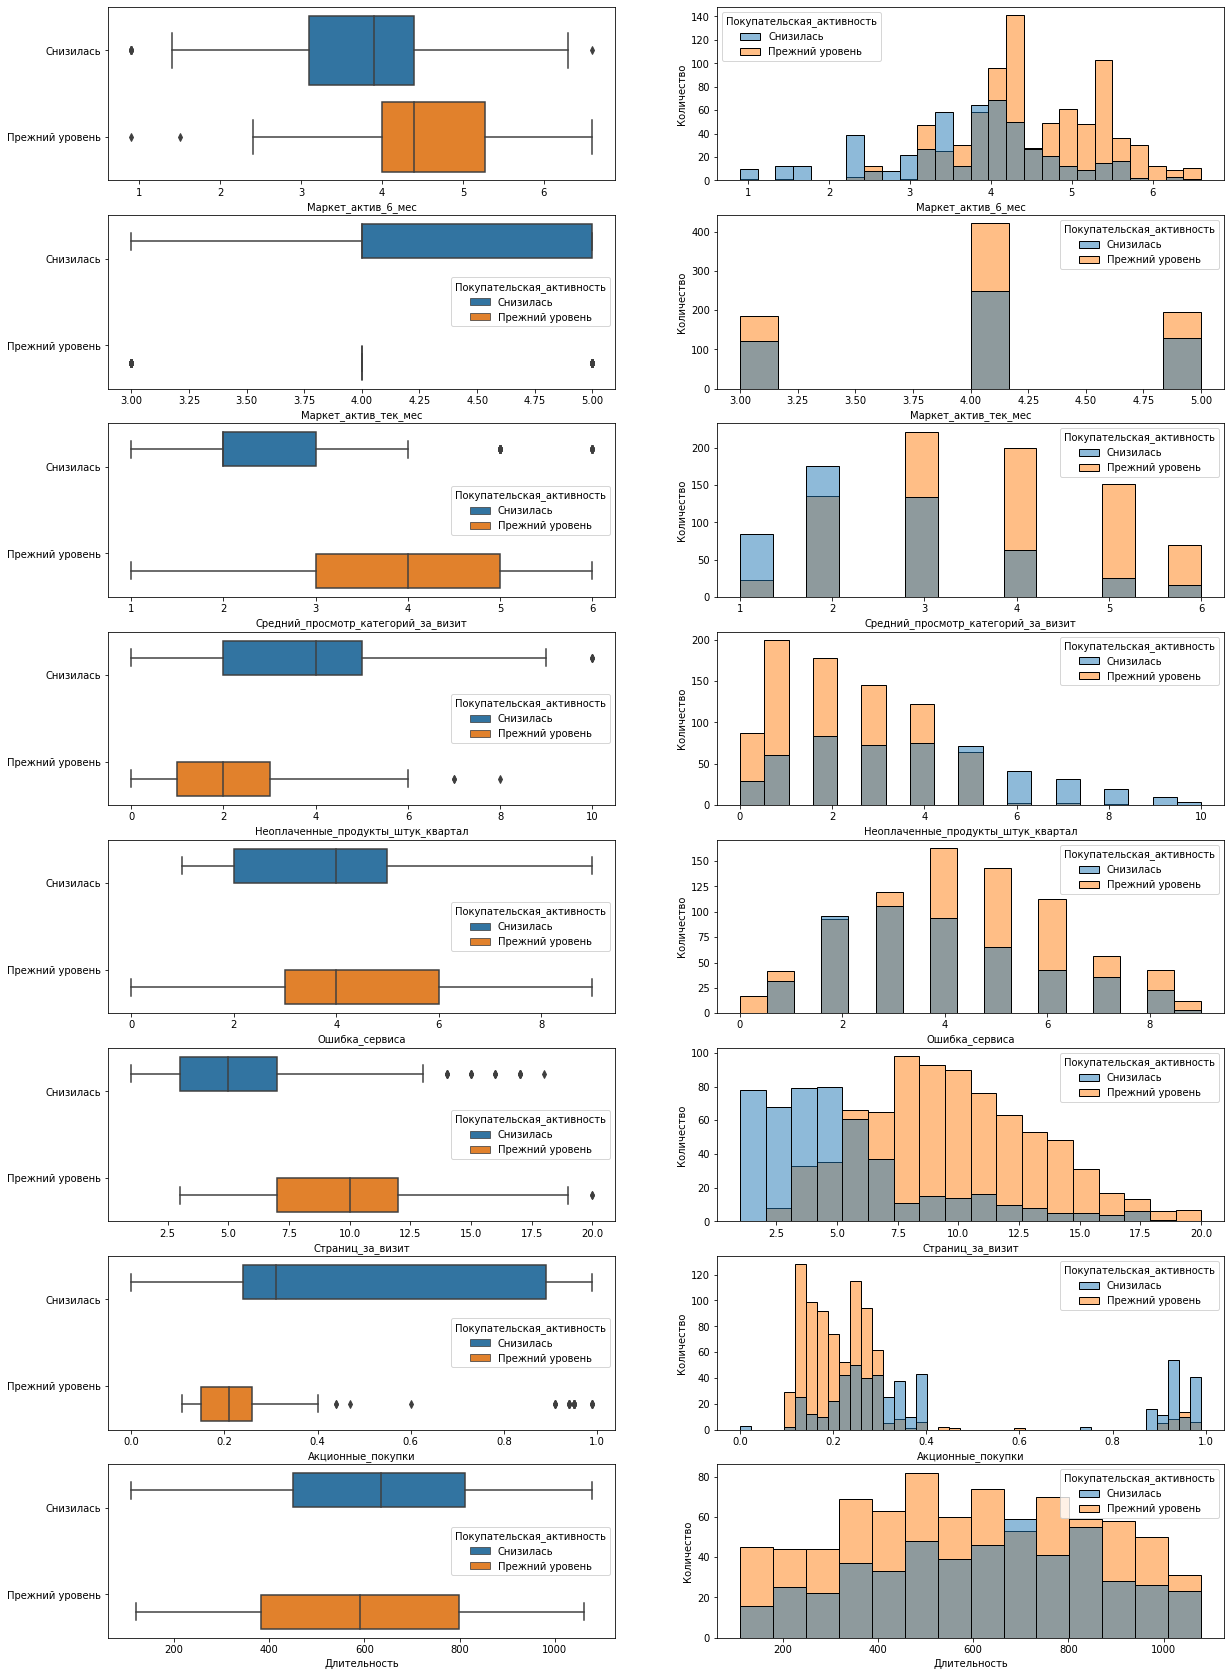

In [15]:
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (20,30))
sns.boxplot(data = data_market, x = 'Маркет_актив_6_мес', y= 'Покупательская_активность',
            orient ='h', ax = axes[0,0])
sns.histplot(data = data_market, x = 'Маркет_актив_6_мес', hue = 'Покупательская_активность', ax = axes[0,1])
axes[0,0].set(ylabel='')
axes[0,1].set(ylabel='Количество')

sns.boxplot(data = data_market, x = 'Маркет_актив_тек_мес',y= 'Покупательская_активность',
            hue = 'Покупательская_активность', orient ='h', ax = axes[1,0])
sns.histplot(data = data_market, x = 'Маркет_актив_тек_мес', hue = 'Покупательская_активность', ax = axes[1,1])
axes[1,0].set(ylabel='')
axes[1,1].set(ylabel='Количество')

sns.boxplot(data = data_market, x = 'Средний_просмотр_категорий_за_визит',y= 'Покупательская_активность',
            hue = 'Покупательская_активность', orient ='h', ax = axes[2,0])
sns.histplot(data = data_market, x = 'Средний_просмотр_категорий_за_визит', 
             hue = 'Покупательская_активность', ax = axes[2,1])
axes[2,0].set(ylabel='')
axes[2,1].set(ylabel='Количество')

sns.boxplot(data = data_market, x = 'Неоплаченные_продукты_штук_квартал',y= 'Покупательская_активность',
            hue = 'Покупательская_активность', orient ='h', ax = axes[3,0])
sns.histplot(data = data_market, x = 'Неоплаченные_продукты_штук_квартал', 
             hue = 'Покупательская_активность', ax = axes[3,1])
axes[3,0].set(ylabel='')
axes[3,1].set(ylabel='Количество')

sns.boxplot(data = data_market, x = 'Ошибка_сервиса',y= 'Покупательская_активность',
            hue = 'Покупательская_активность', orient ='h', ax = axes[4,0])
sns.histplot(data = data_market, x = 'Ошибка_сервиса', 
             hue = 'Покупательская_активность', ax = axes[4,1])
axes[4,0].set(ylabel='')
axes[4,1].set(ylabel='Количество')

sns.boxplot(data = data_market, x = 'Страниц_за_визит',y= 'Покупательская_активность',
            hue = 'Покупательская_активность', orient ='h', ax = axes[5,0])
sns.histplot(data = data_market, x = 'Страниц_за_визит', 
             hue = 'Покупательская_активность', ax = axes[5,1])
axes[5,0].set(ylabel='')
axes[5,1].set(ylabel='Количество')

sns.boxplot(data = data_market, x = 'Акционные_покупки',y= 'Покупательская_активность',
            hue = 'Покупательская_активность', orient ='h', ax = axes[6,0])
sns.histplot(data = data_market, x = 'Акционные_покупки', 
             hue = 'Покупательская_активность', ax = axes[6,1])
axes[6,0].set(ylabel='')
axes[6,1].set(ylabel='Количество')

sns.boxplot(data = data_market, x = 'Длительность',y= 'Покупательская_активность',
            hue = 'Покупательская_активность', orient ='h', ax = axes[7,0])
sns.histplot(data = data_market, x = 'Длительность', 
             hue = 'Покупательская_активность', ax = axes[7,1])
axes[7,0].set(ylabel='')
axes[7,1].set(ylabel='Количество')
plt.show()

<div class="alert alert-info">
<b> Саша: </b>  
<br> 1. Выявлено высокое кол-во коммуникаций в текущем месяце с клиентами, у которых не изменилась покупательская активность, по сравнению с клиентами, у которых снизилась. При этом идет неравномерное количество коммуникаций среди клиентов, у которых снизилась покупательская активность(высокое стандартное отклонение)
    
2. Средний просмотр категорий за визит у клиентов с низкой покупательской активностью значительно ниже, чем у других клиентов.
    
3. Среднее кол-во неоплаченных продуктов у клиентов с низкой покупательской активностью значительно выше, чем у остальных.
    
4. Клиенты, у которых снизилась покупательская активность значительно меньше просматривают страниц за визит, чем остальные клиенты. Просматрвают в основном до 7 страниц за визит.
    
5. Клиенты, у которых снизилась покупательская активность, чаще осуществляют акционные покупки.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Отличное оформление, плюс за разбивку по Таргет.  Единственное, предложил бы использовать цикл или функцию, смотри сколько однотипного кода


 

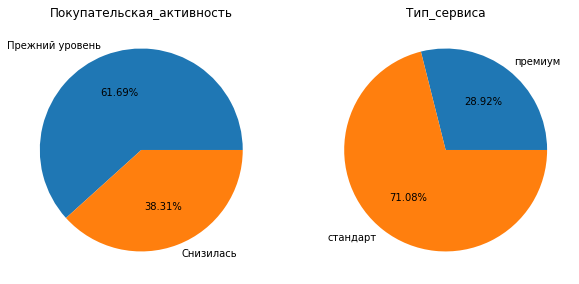

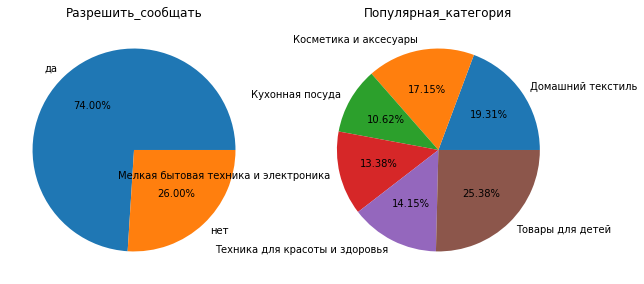

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
(
    data_market.pivot_table(index='Покупательская_активность', aggfunc='count')
    .plot(kind='pie', ylabel = '', y= 'id',
            title='Покупательская_активность',  autopct='%1.2f%%', legend=False, ax=axes[0])
)
(
    data_market.pivot_table(index='Тип_сервиса', aggfunc='count')
    .plot(kind='pie', ylabel='', y= 'id',
            title='Тип_сервиса',  autopct='%1.2f%%', legend=False, ax=axes[1])
)
plt.show()

fig, axess = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
(
    data_market.pivot_table(index='Разрешить_сообщать', aggfunc='count')
    .plot(kind='pie', ylabel='', y= 'id',
            title='Разрешить_сообщать', autopct='%1.2f%%', legend=False, ax=axess[0])
)
(
    data_market.pivot_table(index='Популярная_категория', aggfunc='count')
    .plot(kind='pie', ylabel='', y= 'id',
            title='Популярная_категория', autopct='%1.2f%%', legend=False, ax=axess[1])
)
plt.show();

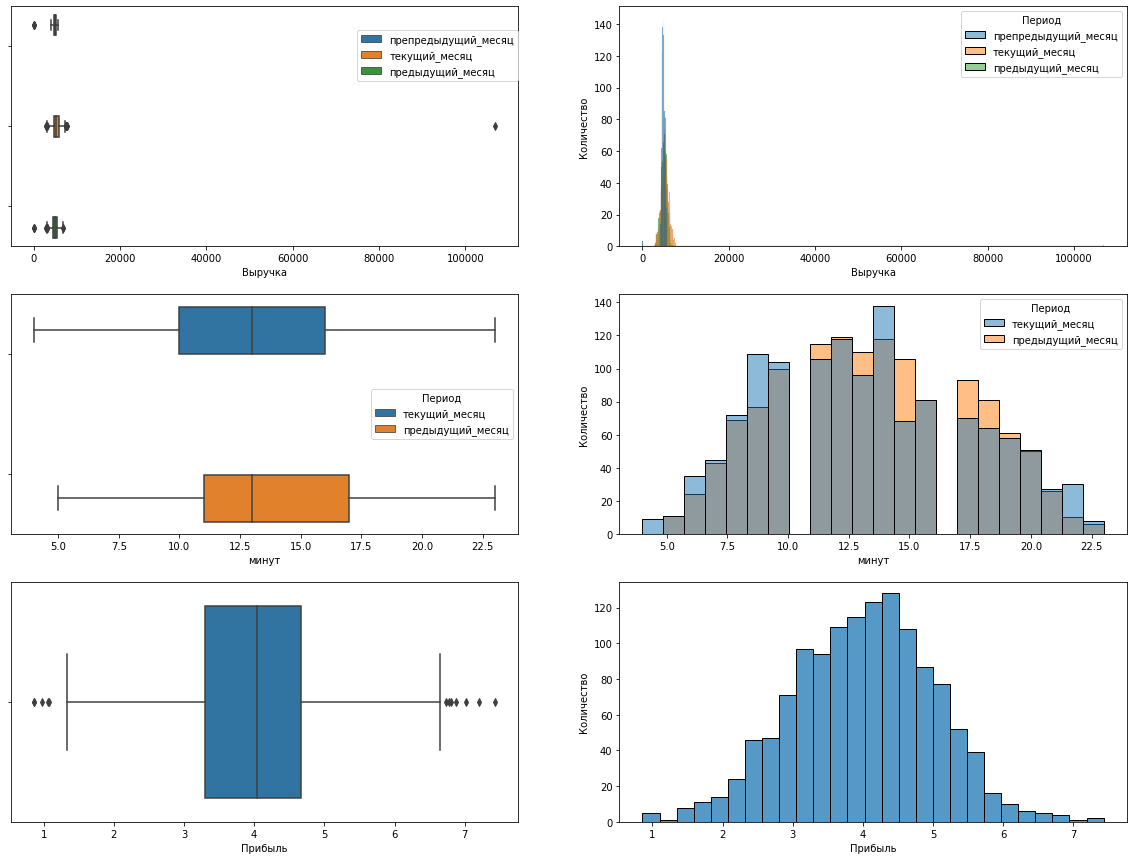

1
6
        id               Период   Выручка
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2


In [17]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
sns.boxplot(data = data_m_money, x = 'Выручка', y= 'Период', hue = 'Период', orient ='h', ax = axes[0,0])
sns.histplot(data = data_m_money, x = 'Выручка', hue = 'Период', ax = axes[0,1])
axes[0,0].legend(bbox_to_anchor = (1, 0.9), loc ='upper right', borderaxespad = 0 )
axes[0,0].set(yticklabels= (''))
axes[0,0].set(ylabel='')
axes[0,1].set(ylabel='Количество')

sns.boxplot(data=data_m_time, x='минут', y= 'Период', hue='Период', orient='h', ax=axes[1,0])
sns.histplot(data=data_m_time, x='минут', hue='Период', ax=axes[1,1])
axes[1,0].set(yticklabels= (''))
axes[1,0].set(ylabel='')
axes[1,1].set(ylabel='Количество')

sns.boxplot(data=data_money, x='Прибыль', orient='h', ax=axes[2,0])
sns.histplot(data=data_money, x='Прибыль', ax=axes[2,1])
axes[2,1].set(ylabel='Количество')

plt.show()

print(len(data_m_money.query('Выручка>10000')))
print(len(data_m_money.query('Выручка<1000')))
print(data_m_money.query('id==215380'))
data_m_money = data_m_money.query('1000<=Выручка<=10000')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Во-первых нет никаких комментариев своих действия. Во-вторых непонятно почему ты удаляешь данные.  У нас здесь единственный выбор выручки, всё остальное излишне


<div class="alert alert-info">
<b> Саша: </b>  
<br> Выявили и удалили редкие аномалии в выручке(`1000 <=Выручка <=10000`)
</div>

<div class="alert alert-info">
<b> Саша: </b>  
<br> удалил код по удалению аномалий в прибыли.
</div>

[Text(0, 0.5, 'Количество')]

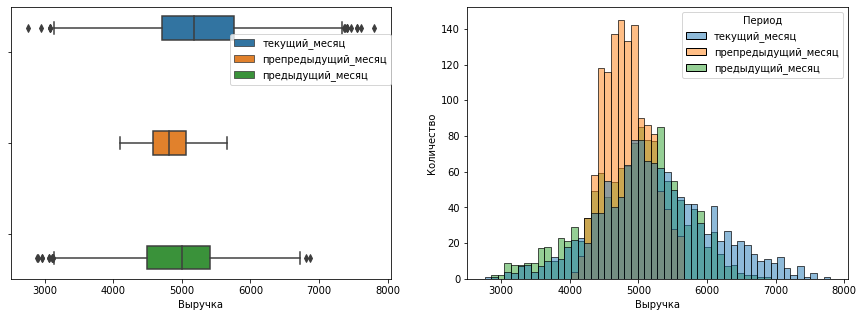

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
sns.boxplot(data = data_m_money, x = 'Выручка', y= 'Период', hue = 'Период', orient ='h', ax = axes[0])
sns.histplot(data = data_m_money, x = 'Выручка', hue = 'Период', ax = axes[1])
axes[0].legend(bbox_to_anchor = (1, 0.9), loc ='upper right', borderaxespad = 0 )
axes[0].set(yticklabels= (''))
axes[0].set(ylabel='')
axes[1].set(ylabel='Количество')

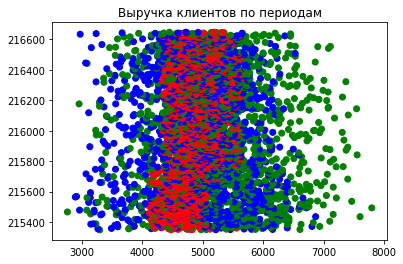

In [19]:
colidx = data_m_money.groupby("Период").grouper.group_info[0].tolist()
colors=["blue", "red", 'green']

fig, ax = plt.subplots()
ax.scatter(data_m_money["Выручка"], data_m_money["id"], c=[colors[x] for x in colidx])
plt.title('Выручка клиентов по периодам')
plt.show()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Хотел получить соотношение между выручками и прибыльностью? Хорошо бы какие-то выводы оставить

<div class="alert alert-info">
<b> Саша: </b>  
<br> уточни, нужно по этой диаграмме еще дополнительные промежутночные выводы сделать? привык(как научили) делать промежуточные выводы в конце каждого пункта, а не еще доп.комментарии после какого либо написания кода... Нужно еще что-то добавить по данной диаграмме, кроме моего вывода ниже, а именно: "Наблюдается сильный разброс выручки за текущий_месяц и небольшой разброс(низкое стандартное отклонение) за препредыдущий_месяц" ?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 Дубликаты выводов не обязательны, но я скажем так не сличил твой график с таким выводом. Ты же строишь зависимость между выручкой и прибыльностью.  И может идея была хорошая, но на таком графике мало что видно

In [20]:
# Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.
data_mm = data_m_money.groupby('id').count().query('Период >=3 and id in @data_money.groupby("id").count().index')
print(len(data_mm))
data_m_money = data_m_money.query('id in @data_mm.index')
data_market = data_market.query('id in @data_mm.index')
display(data_m_money.query('Период=="препредыдущий_месяц"')['Выручка'].describe(),
      data_m_money.query('Период=="предыдущий_месяц"')['Выручка'].describe(),
      data_m_money.query('Период=="текущий_месяц"')['Выручка'].describe()
     )

1296


count    1296.000000
mean     4836.202160
std       333.514091
min      4098.000000
25%      4584.500000
50%      4810.500000
75%      5056.000000
max      5663.000000
Name: Выручка, dtype: float64

count    1296.000000
mean     4947.468750
std       700.797239
min      2890.000000
25%      4498.125000
50%      5005.500000
75%      5405.625000
max      6869.500000
Name: Выручка, dtype: float64

count    1296.000000
mean     5238.096065
std       834.318717
min      2758.700000
25%      4706.050000
50%      5179.950000
75%      5759.275000
max      7799.400000
Name: Выручка, dtype: float64

**Вывод:**  
    Устранили аномалии в данных, убрали данные по клиентам  с выручкой равной 0. Отобрали клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Наблюдается сильный разброс выручки за текущий_месяц и небольшой разброс(низкое стандартное отклонение) за препредыдущий_месяц

 


<div class="alert alert-danger">
<font size="5">
<b>Комментарий ревьюера</b></font>



Ошибка ❌:

    
    
- Опять же вспоминаем прошлый проект, и требования о использовании двух видов графиков для количественных признаков.  Почему мы так делаем!? Гистограмма позволяет вам визуально оценить форму распределения данных. Она особенно полезна для выявления бимодальности. Ящик с усами отлично подходит для выявления выбросов, оценки разброса данных, асимметрии - это не всегда легко заметить на гистограмме
 

<div class="alert alert-warning">


Совет 🤔:

   
- можно пойти дальше  и для графиков распределений сделать разбивку по таргету. Так мы можем получить дополнительную информацию для лучшего понимания наших данные, может что-то пригодится для раздела сегментации. Если использовать seaborn, это можно сделать с помощью аргумента [hue](https://www.statology.org/seaborn-histogram-hue/). В результате мы получим наложенные (в разбивки по таргету) 2 гистограммы (boxplot тоже неплохо добавить) для каждого количественного признака. И о категориальных незабываем. Будет красиво и информативно.
 

- для красоты восприятия рекомендую использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/): один столбец гистограммы, другой boxplot
 

    
- а ещё бы  посоветовал использовать библиотеку    [seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/), она строит  симпатичнее и проще matplotlib. Использовать matplotlib это как выучиться на механике, но если умеешь на механике но на автомате (seaborn) точно получится. Есть небольшие отличия в названиях графиках, и фнкциональных возможностях, но это мелочи
    
    
 
- для гистограмм по выручке и минутам, стоит предварительно сделать группировку по "период" (у нас будет 3 графика по выручке и 2 по минутам), это разумно, ведь именно в таком виде мы используем их     

<div class="alert alert-info">
<b> Саша: </b>  
<br> ✔️
</div>

## Объединение таблиц

Объединим таблицы data_market, data_m_money, data_m_time.

In [21]:
data_mt = (
    data_m_time.pivot_table(index = 'id', columns = 'Период', values = 'минут')
    .rename(columns = {'предыдущий_месяц':'предыдущая_минут', 
                       'текущий_месяц':'текущая_минут'})
    .reset_index(col_level=True)
)
data_mm = (
    data_m_money.pivot_table(index = 'id', columns = 'Период', values = 'Выручка')
    .rename(columns = {'препредыдущий_месяц':'препредыдущая_выручка',
                       'предыдущий_месяц':'предыдущая_выручка', 
                       'текущий_месяц':'текущая_выручка'})
    .reset_index(col_level=True)
)
data = data_market.merge(data_mt, on='id')
data = data.merge(data_mm, on='id').set_index('id')
data['выручка_3_месяца'] = data['препредыдущая_выручка'] + data['предыдущая_выручка'] + data['текущая_выручка']
data

,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущая_минут,текущая_минут,предыдущая_выручка,препредыдущая_выручка,текущая_выручка,выручка_3_месяца
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6,14659.6
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4,15341.9
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4,17561.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.5,16274.0
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.5,15251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,3664.0,4704.0,4741.7,13109.7
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,4729.0,5299.0,5353.0,15381.0
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,5160.0,5334.0,5139.2,15633.2


**Вывод:**  
Объединили 3 таблицы (data_market, data_m_time, data_m_money), разбили периоды на столбцы.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- данные для моделирования подготовлены



- не активные клиенты убраны


- 👍pivot_table



## Корелляционный анализ

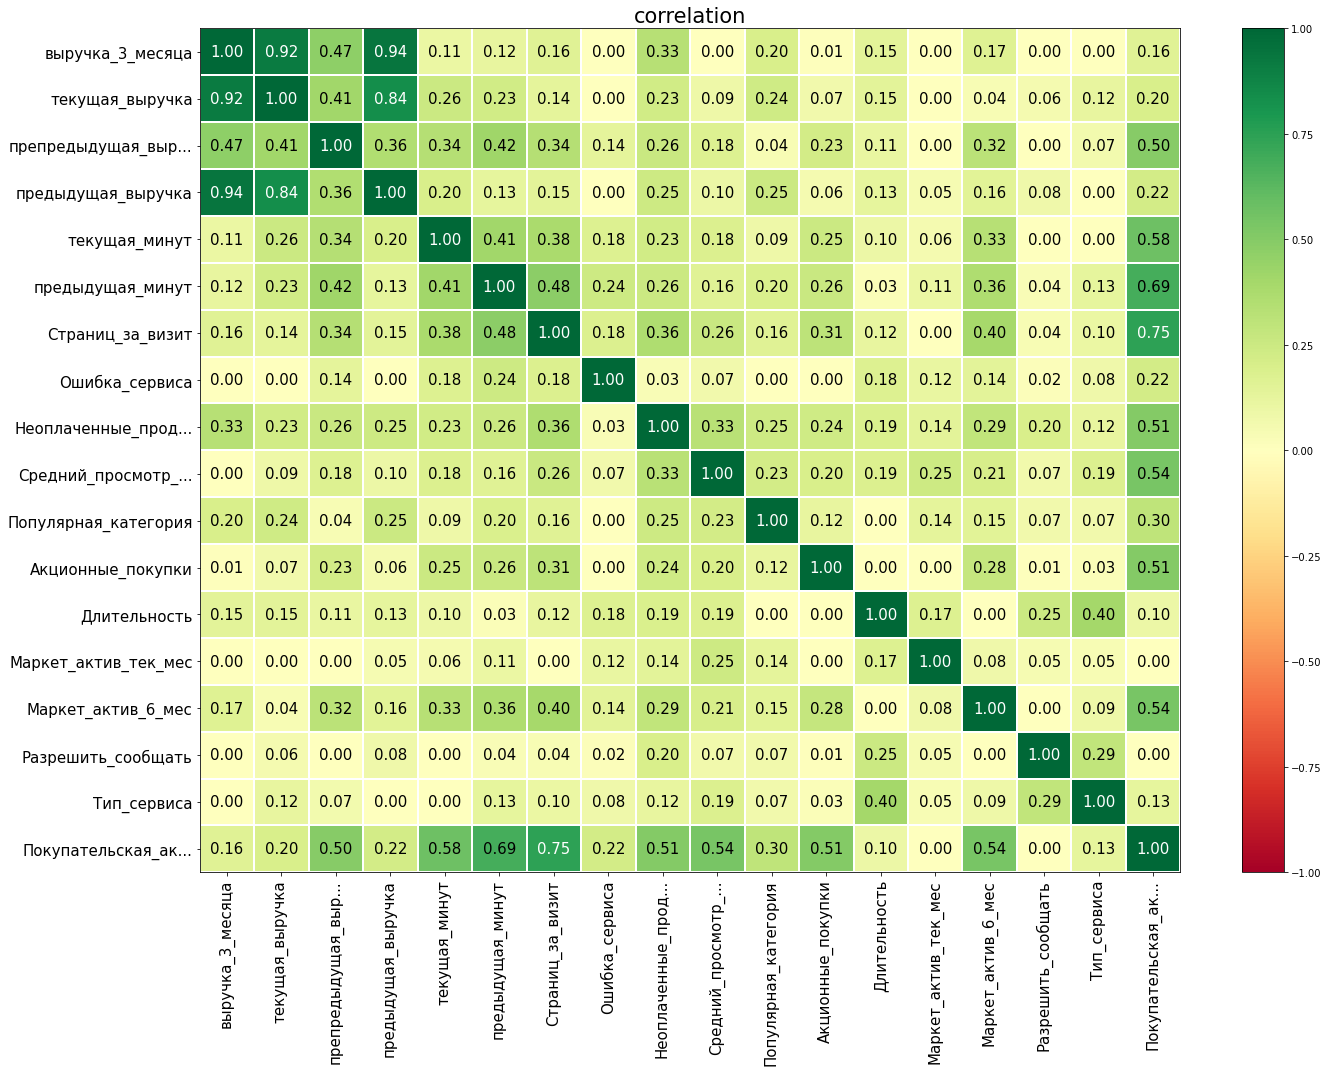

In [22]:
phik_overview = data.phik_matrix(
    interval_cols=['текущая_минут', 'предыдущая_минут', 'Длительность', 'текущая_выручка', 
                    'предыдущая_выручка', 'препредыдущая_выручка',
                    'Страниц_за_визит', 'Неоплаченные_продукты_штук_квартал', 
                    'Средний_просмотр_категорий_за_визит', 'Маркет_актив_6_мес', 
                    'Маркет_актив_тек_мес', 'Ошибка_сервиса', 'Акционные_покупки', 'выручка_3_месяца'])

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 15),
    fontsize_factor=1.5
);

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


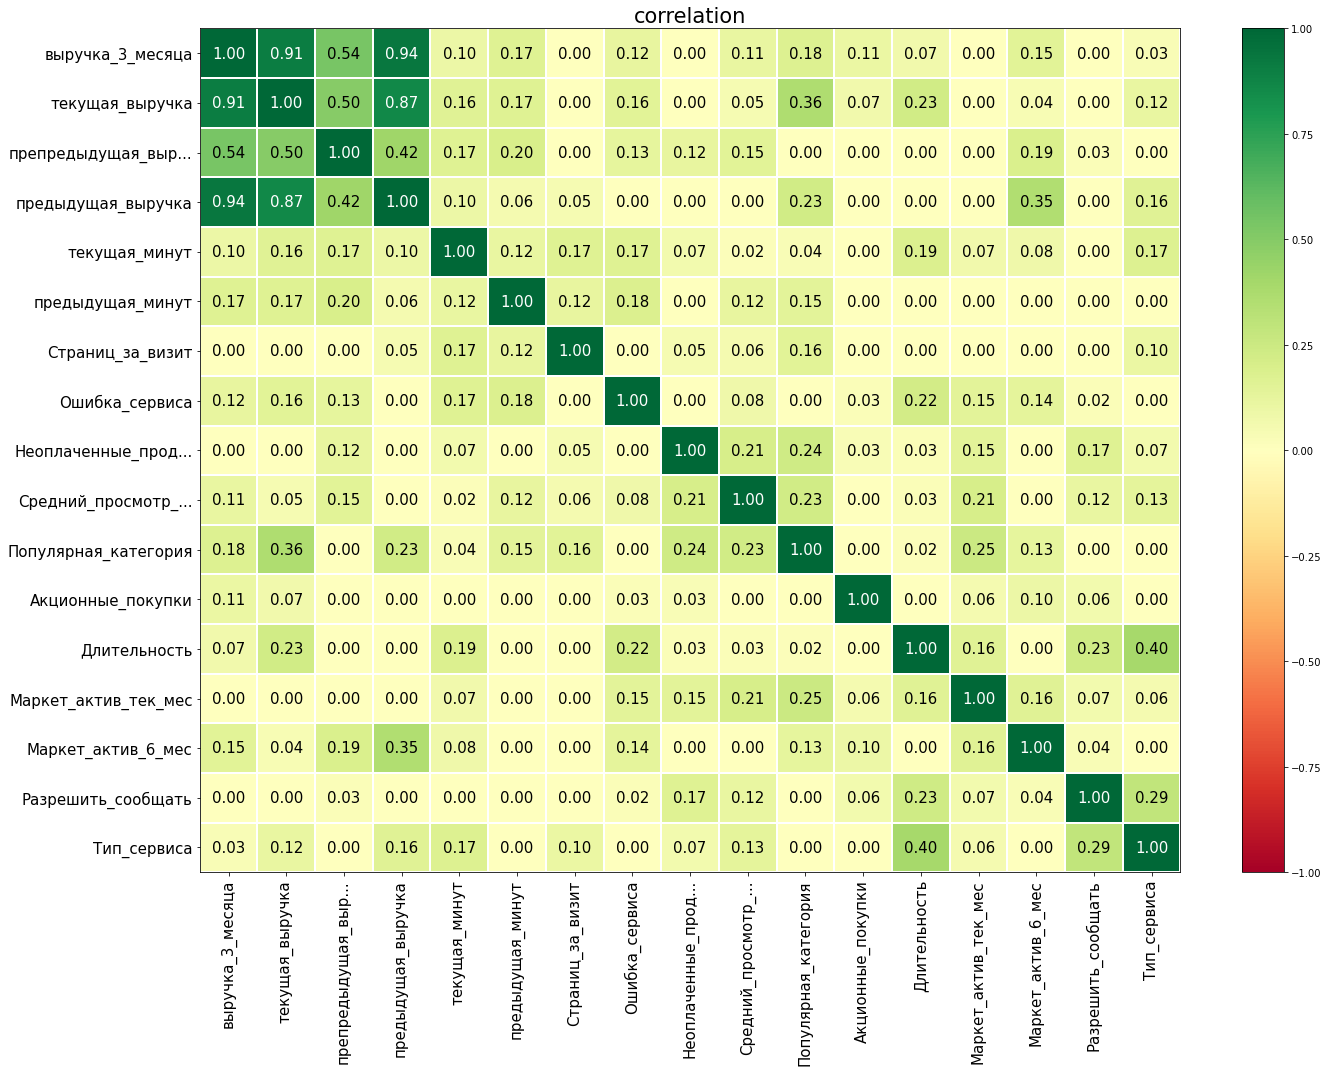

In [23]:
phik_overview = data.query('Покупательская_активность == "Прежний уровень"').phik_matrix(
    interval_cols=['текущая_минут', 'предыдущая_минут', 'Длительность', 'текущая_выручка', 
                    'предыдущая_выручка', 'препредыдущая_выручка',
                    'Страниц_за_визит', 'Неоплаченные_продукты_штук_квартал', 
                    'Средний_просмотр_категорий_за_визит', 'Маркет_актив_6_мес', 
                    'Маркет_актив_тек_мес', 'Ошибка_сервиса', 'Акционные_покупки', 'выручка_3_месяца'])

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 15),
    fontsize_factor=1.5
);

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


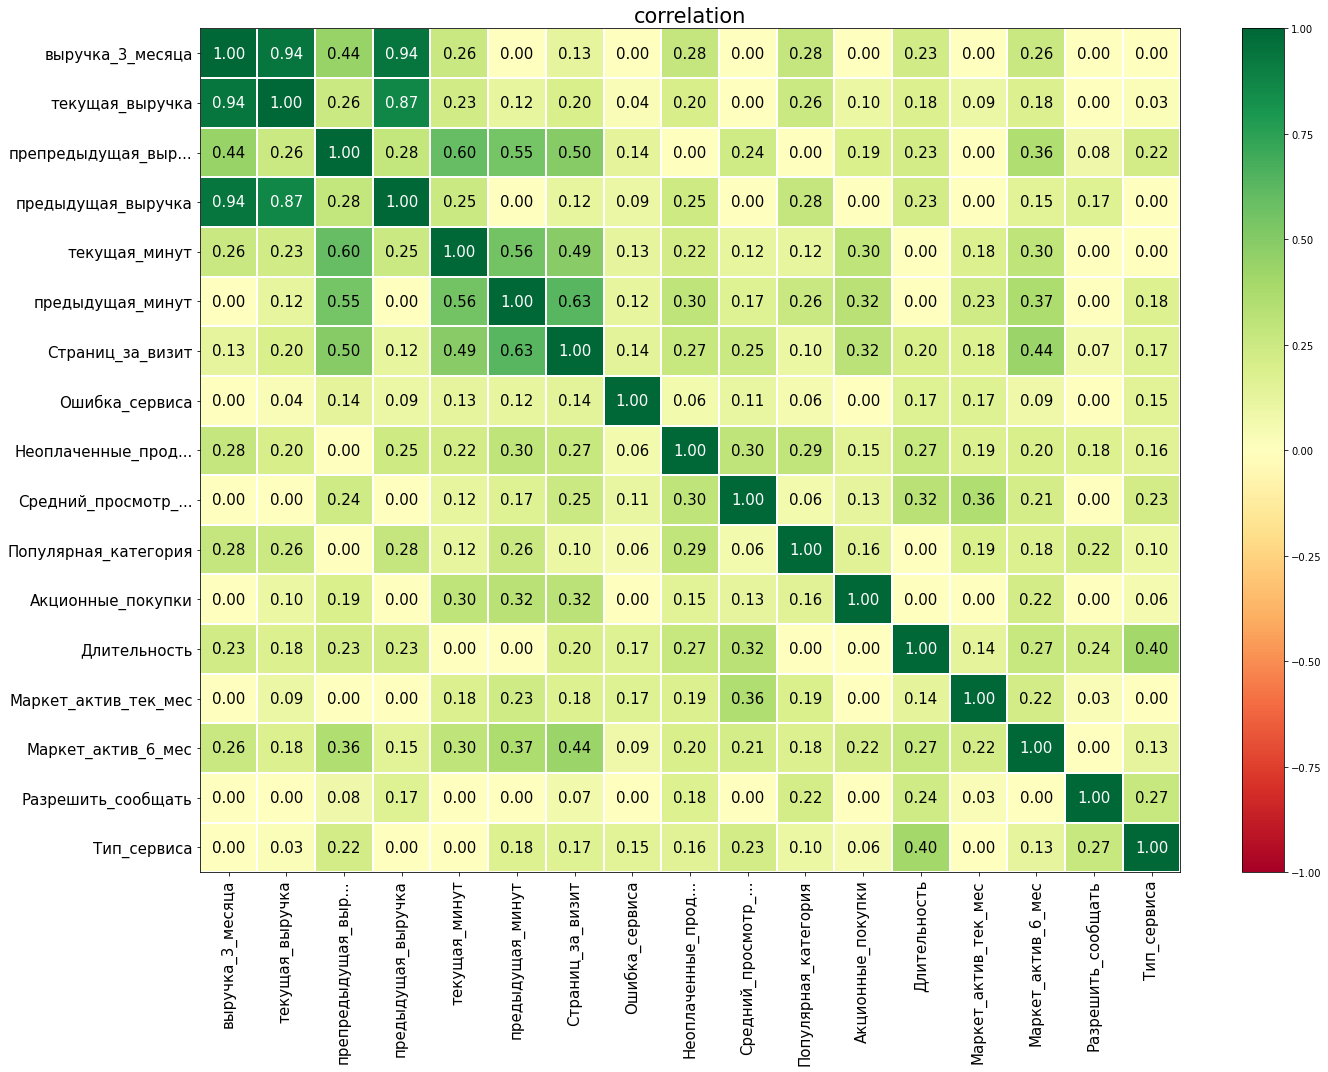

In [24]:
phik_overview = data.query('Покупательская_активность == "Снизилась"').phik_matrix(
    interval_cols=['текущая_минут', 'предыдущая_минут', 'Длительность', 'текущая_выручка', 
                    'предыдущая_выручка', 'препредыдущая_выручка',
                    'Страниц_за_визит', 'Неоплаченные_продукты_штук_квартал', 
                    'Средний_просмотр_категорий_за_визит', 'Маркет_актив_6_мес', 
                    'Маркет_актив_тек_мес', 'Ошибка_сервиса', 'Акционные_покупки', 'выручка_3_месяца'])

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 15),
    fontsize_factor=1.5
);

Утечки данных, связанных с покупательской активностью, не выявлено. Мультиколлинеарность не выявлена. На покупательскую активность сильно влияет время нахождения на сайте и количество просмотренных страниц за минуту.

 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:







- здорово что использован phik, это позволяет тебе не обращать внимание на ограничения Пирсона/Спирмена 
  


<div class="alert alert-warning">


Совет: 

 
- можешь ещё сделать проверку на мультиколлинеарность с помощью VIF 


- используя phik_matrix  лучше вручную указать столбцы с количественными признаками через  [interval_cols](https://dzen.ru/a/ZEtcuc4K2RX_Jstr)     
    
    
    

- Для того чтобы чтобы лучше понять наши данные (для моделирования не пригодиться, а вот для сегментации может), предлагаю построить 2 матрицы коррелции phik, одну на данных покупателей со снижающей активностью, другую для сохраняющих активность, и посмотреть есть ли отличия (обрати внимание на корреляцию между выручками и акционными продажами, есть ли там разница а если есть как ее можно обьяснить)
 
    
    

In [25]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('Покупательская_активность ~ предыдущая_минут+Страниц_за_визит', data=data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,13.156712,Intercept
1,1.220793,предыдущая_минут
2,1.220793,Страниц_за_визит


<div class="alert alert-info">
<b> Саша: </b>  
<br> указал вручную кол-енные столбцы,попробовал VIF. Взял признаки с высокими значениями по phik- мультиколлинеарности с помощью VIF тоже не выявлено. Корреляция между выручкой и акционными покупками практически отсутствует. У покупателей, у которых снизилась покупательская активность, выручка за препредыдущий период сильнее коррелирует, чем в остальные периоды и чем у других клиентов. Возможно в данный период срабатывала маркетинговая ловушка(цена завышена-перечеркнута и указана новая цена со скидкой) где акционные товары приносили прибыль, после чего(в последующие периоды) клиенты больше не попадались на такие ловушки.
    
Построил 3 графика корреляции. общий и по таргету.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет 🤔:






В прошлом проекте мы активно использовали scatter_plot для уточнения характера связи между признаками и удоем, и на основе увиденного сделали некоторые преобразования, помогающие преодолеть ограничения линейной модели. В этом проекте мы используем нелинейные модели для которых это не проблема, и таргет у нас не количественный а категориальный. Тем не менее и в этом проекте можно построить scatter_plot между количественными признаками, а таргет использовать  в качестве фильтра. Напомню что проще всего это реализовать с помощью [sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). Это не пригодится нам для улучшения метрики, но возможно мы увидим что то полезное для сегментации или лучшего понимания наших данных. 

- Можно c помощью scatter_plot сконцентрироваться на связи между выручка текущая - выручка за прошлый. Там явная линейная зависимость, причем как будто бы множество точек тяготеют к двум прямым. Можно поискать факторы которые описывает эти два разных множества. Можно к выручке за прошлый месяц добавить выручку за позапрошлый месяц (или отнять) и тогда в каких то группировках по категориальным признакам будет очень четкая линейная зависимость достигающая по r2 за 0.9. Из этого можно сделать вывод что  в определенных группировках, зависимость между выручками за разные периоды практически дерерминирована (очень высокий показатель r2), то есть из выручки за прошлый (и с учетом позапрошлого месяца) мы можем точно спрогнозировать расходы клиента за текущий месяц. О чем это может говорить? 



- Можно посмотреть scatter_plot между id и акционными покупками. Можно кое что интересное увидеть и дать этому обьяснение


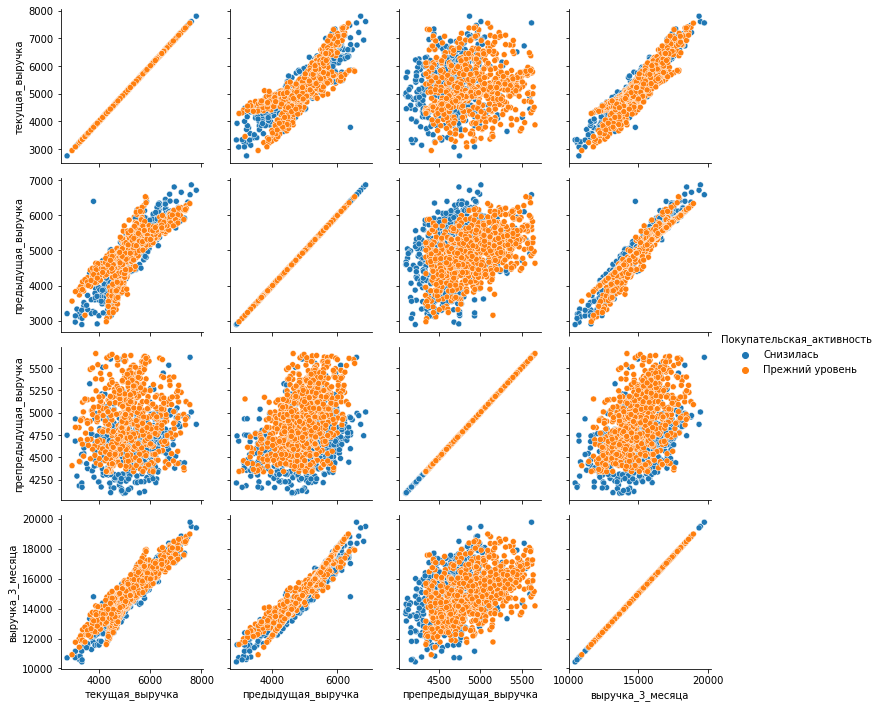

In [26]:
g = sns.PairGrid(data[['текущая_выручка', 'предыдущая_выручка', 
                       'препредыдущая_выручка', 'выручка_3_месяца', 
                       'Покупательская_активность']], hue='Покупательская_активность')
g.map(sns.scatterplot)
g.add_legend();

<div class="alert alert-info">
<b> Саша: </b>  
<br> действительно, наблюдается линейная зависимость текущей выручки с предыдущей у клиентов, у которых снизилась покупательская активность. И по данным периодам можно определить, как покупательская активнось повлияет на выручку за 3 месяца.
</div>

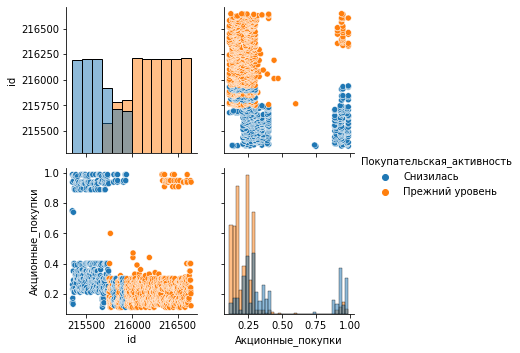

In [27]:
g = sns.PairGrid(data_market[['id', 'Акционные_покупки', 'Покупательская_активность']], hue='Покупательская_активность')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend();

<div class="alert alert-info">
<b> Саша: </b>  
<br> не совсем понимаю трактования. Вижу только, что при сравнении id с акционными покупками наблюдается сегментирование клиентов, как с "снизилась" так и с "прежний уровень". и те и те клиенты поделены на тех, у которых в среднем доля акционных покупок составляет примерно 0,25% и тех, у кого доля составляет 0,75%. При этом, "прежний уровень" в основном не пользуется акционными покупками, в то время как другие разделены поровну.
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Я бы обратил внимание на дырку посередине (Для средних id отсутствует акционные покупки), но каких-то выводов из этого сделать трудно, скорее всего это лишь говорит о том что наш датассет искусственно сгенерирован (Можно было подумать что тут дело во временной составляющей id, но это гипотеза не бьётся с показателем "длительность")

## Использование пайплайнов

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



    
    ohe_columns = ['Разрешить_сообщать',  'Популярная_категория']
    ord_columns = ['Тип_сервиса']
    
    
Тут всё логично

  

И правильно определил положительный класс

<div class="alert alert-warning">



Совет 🤔:


    RANDOM_STATE = 42
    TEST_SIZE = 0.25    
    
Вот это лучше оставить после импорта
    
    
  
Кроме того посоветовал бы ячейку ниже разбить на несколько. Стилистически более верно не сваливать всё в одну кучу    
    
    
    
    
В будущем при предобработке данных можешь учитывать следующие моменты:

    
- если у категориального признака большое количество уникальных значений, применение One-Hot Encoding может привести к большому количеству новых признаков, это усложнит работу моделей
    
- у catboost и lighgbm есть собственные инструменты работы с категориальными данными, нужно только указать какие столбца содержат категориальные данные
    
- при работе с количественными признаками для линейных и метрических (модели в которых измеряется расстояние) моделей  обязательно делаем Scaler, в отличие от моделей на основе деревьев решений, для них Scaler не нужен
        

Можешь подумать над вопросом почему для линейных моделей некорректное использование OrdinalEncoder может вызвать больше проблем чем для случайного леса  или других моделей в основе которых лежат деревья решений   



<div class="alert alert-info">
<b> Саша: </b>  
<br> не понял, RANDOM_STATE = 42
TEST_SIZE = 0.25    это в самом верху указать, в начале этапа "загрузка данных?"
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Сразу после импортов библиотек и ячейки с твоими функциями (Если они есть)

<div class="alert alert-info">
<b> Саша: </b>  
<br> по поводу OrdinalEncoder - что-то вообще не приходят мысли. На сколько понимаю модели на основе дерева решений могут проигнорировать какое-то неверное значение и не должно произойти сбоя/сильно низкой метрики, в то время как при линейной модели может произойти либо сбой в модели либо будет далеконекачественная модель, так как деревья лучше справляются с категориальными признаками.
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:


Мне как-то трудно уловить твою мысль. Дело в том что Линейная регрессия после OrdinalEncoder будет воспринимать категориикак цифры, то есть как будто в них есть какая-то логика "больше-меньше" (Хотя какой-то такой логики нет, товары для красоты не "больше" товаров для детей итп) и логика соотношений (товар для детей + товар красоты = текстиль), и под это будет пытаться строить прямую (гиперплоскость) - и в итоге чушь.  А случайный лес (бустинги) строит на основе деревьев решений, которые делают сплиты,  там тоже есть "больше меньше", но дерево решений - это нелинейное модель, поэтому за счёт своей гибкости не такая уж и проблема что OrdinalEncoder создает фальшивые "больше-меньше"


In [28]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Покупательская_активность', axis=1),
    data['Покупательская_активность'].apply(lambda x: 1 if x=='Снизилась' else 0),
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['Покупательская_активность'])

ohe_columns = ['Разрешить_сообщать',  'Популярная_категория']
ord_columns = ['Тип_сервиса']
num_columns = ['текущая_минут', 'предыдущая_минут', 'Длительность', 'текущая_выручка', 
               'предыдущая_выручка', 'препредыдущая_выручка',
               'Страниц_за_визит', 'Неоплаченные_продукты_штук_квартал', 
               'Средний_просмотр_категорий_за_визит', 'Маркет_актив_6_мес', 
               'Маркет_актив_тек_мес', 'Ошибка_сервиса', 'Акционные_покупки']

In [29]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', sparse_output=False))
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [30]:
param_grid = [
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
   
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

   
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(
            random_state=RANDOM_STATE
        )],
        'models__degree' : range(0,2),
        'models__kernel' : ['poly','rbf', 'sigmoid'],
        'models__C': range(0,3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [31]:
start = time.time() 
grid = GridSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)



print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на кроссвалидационной выборке:', grid.best_score_)


y_test_pred = grid.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

grid_search_time = time.time() - start
print(f'Search time:{grid_search_time}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                            

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 615.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/python3

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Вылетает ошибка     
    
    TypeError: __init__() got an unexpected keyword argument 'sparse'


    
Стоит перед отправкой проекта перезапустить ядро и выполнить все ячейки – так можно проверить, что код работает:
    
<img src='https://jing.yandex-team.ru/files/aslvova/Screenshot%202022-05-31%20at%2011.08.40.png' alt='restart_kernel_and_run_all' width='400'>

Не знаю какая картинка откроется...

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)





<div class="alert alert-warning">
 

Совет 🤔:


ты используешь устаревшую версию библиотеки. Стоит обновить.  Пишем  
    
    
 
    
    !pip install -U scikit-learn    
    
Перезапускаем ядро и используем
    
    
    sparse  ------>  sparse_output
    
    
И
    
    get_feature_names  ----->  get_feature_names_out

<div class="alert alert-info">
<b> Саша: </b>  
<br> обновил, но после твоего комментария я проверил на старой версии-у меня ошибка не вылетала
</div>

**Вывод:**   
Построили пайплайны для выбора лучшей модели.  
Лучшая модель: LogisticRegression с гиперпараметрами: C=1, penalty='l1', random_state=42, solver='liblinear').  
Метрика лучшей модели на кроссвалидационной выборке: 0.8975774079864989   
Метрика ROC-AUC на тестовой выборке: 0.917404845690248

 
<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:






- roc_auc_score подсчитываем с помощью вероятности
    
    
- И нашёл ничего по поводу обоснования почему используешь ROC-AUC (Тут можно либо подчеркнуть преимущества этой метрики, либо учесть бизнес-постановку задачи)    


	print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)
    
- это неверно .best_score_ это метрика по кросс валидацинной выборке а не на тренировочной. Мы не выбираем лучшую модель по результату на тренировочный выборке, потому что она ничего не показывает. Например если взять дерево решение достаточно большой глубины, то метрика на тренировочной будет равна 100%, но это результат запоминание данных, а не обобщения. Раньше был проект "ведения машинное обучение", где чётко об этом рассказывалось - обучаемся на train, гиперпараметры подбираем по валидационной выборке (в случаи GS кроссвалидационной), а затем проводим финальное тестирование. В прежнем проекте студенты вручную разбивали на три выборки и в цикле подбирали гиперпараметры, а сейчас сразу GS, но он делает то же самое: ты подаёшь него X_train, и он внутри себя разбивает его на тренировочную и валидационную (причем несколько раз)... В общем такой моментик Можешь посмотреть [тут](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0) с помощью VPN о логике использования выборок  





<div class="alert alert-warning">



Совет 🤔:





- бывает полезно замерить время исполнения кода в ячейке, это можно сделать с помощью магической функции %%time    
    
 

- в нашем проекте мы использовали pipeline со стандартными функциями sklearn (StandardScaler, MinMaxScaler итд итп), но ведь у нас может быть своя собственная функция преобразования данных. Например мы хотим заполняем пропуски средней в какой то группировке, но должны учесть логику моделирования, по которой мы можем использовать только данные из train (делаем .fit), а затем "обученную на train функцию преобразования" используем на test/valid (делаем .transform), по ссылкам можно посмотреть как это можно реализовать [Ссылка 1](https://dzen.ru/media/id/5ee6f73b7cadb75a66e4c7e3/sozdanie-polzovatelskih-preobrazovatelei-dannyh-62b2a9a80e49941961ffc7a2),
[Ссылка 2](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156)

Обрати внимание что мы создаем для этого класс, наследуя классы TransformerMixin и BaseEstimator, чтобы можно было применять  .fit(X_train), .predict(X_test)    


    
- для расширения кругозора: GridSearch/RandomizedSearch это классика, но есть и другие варианты подбора гиперпараметров, можешь [ознакомиться](https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/). Выделю оptuna, очень много плюсов, причем изучение можно начать с [**OptunaSearchCV**](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html). Интерфейс практически такой же, как у GridSearch/RandomizedSearch

    

<div class="alert alert-info">
<b> Саша: </b>  
<br> не понял тебя, мне просто фразы в print скорректировать? код `grid = GridSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)` это ж и есть кроссвалидация на тренировочной выборке. он сам же разбивает грубо говоря на несколько валидационных выборках. grid.best_estimator_ -этож тоже выбирается лучшая модель при кроссвалидации на тренировочной выборке, а grid.best_score_ показывает метрику модели, которую определил код grid.best_estimator_ . Или что-то я не понял? Скорректировал на фразу: Метрика лучшей модели на кроссвалидационной выборке
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Да просто фразу 
    
    
    
    grid.fit(X_train, y_train)` это ж и есть кроссвалидация на тренировочной выборке. он сам же разбивает грубо говоря на несколько валидационных выборках. grid.best_estimator_ -этож тоже выбирается лучшая модель при кроссвалидации на тренировочной выборке, а grid.best_score_ показывает метрику модели, которую определил код grid.best_estimator_ . Или что-то я не понял? 
    
    
    
Так всё и есть. Вот поэтому и посоветовал тебе написать "..  метрика на кроссвалидационной выборке"

<div class="alert alert-info">
<b> Саша: </b>  
<br> выбрали метрику `roc_auc`, так как объекты не сбалансированы по целевому признаку и необходимо получить обобщенные данные, вне зависимости от выбранного порога вероятности.
по поводу Optuna спасибо, помню, но решил перебрать все модели, чтобы наверняка:)
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

## Анализ важности признаков

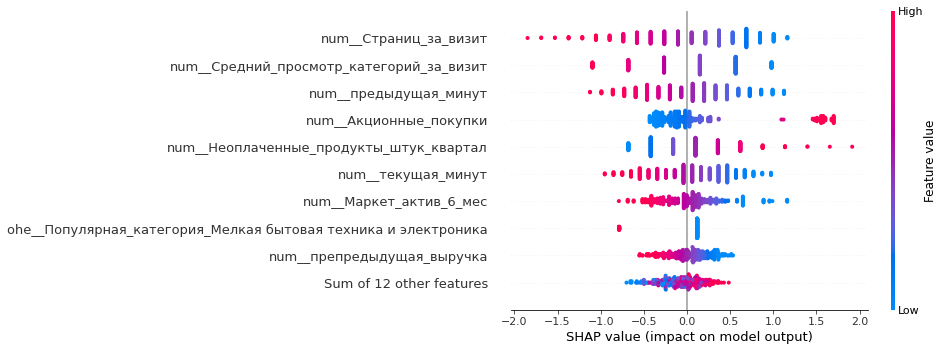

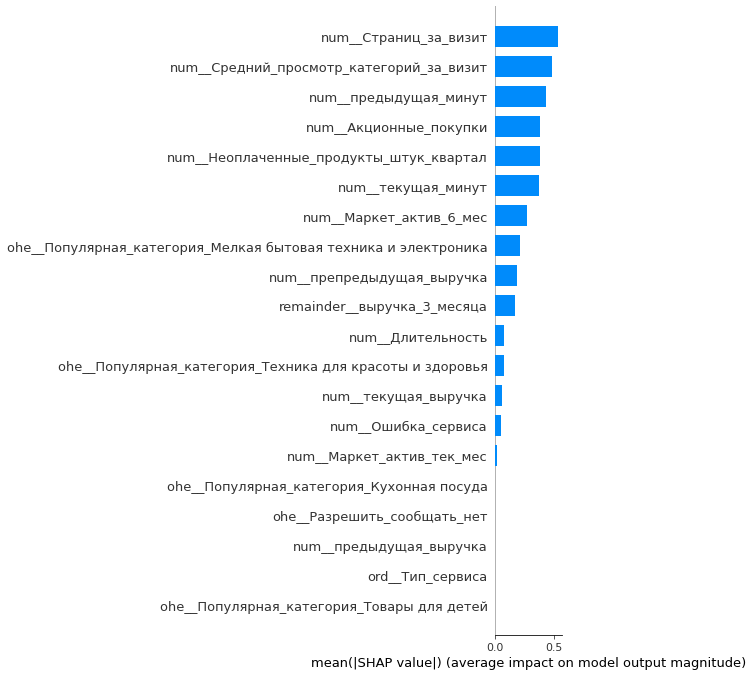

In [32]:
x_Train = grid.best_estimator_.named_steps['preprocessor'].fit_transform(X_train)
x_Test = grid.best_estimator_.named_steps['preprocessor'].transform(X_test)
x_Train = pd.DataFrame(x_Train, columns=grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out())
x_Test = pd.DataFrame(x_Test, columns=grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out())

model = grid.best_estimator_.named_steps['models']
explainer = shap.LinearExplainer(model, x_Train)
shap_values = explainer(x_Test)
shap.plots.beeswarm(shap_values)
shap.summary_plot(shap_values, x_Test, plot_type = 'bar')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




Это не технично опять обучать модель, ведь у тебя она уже есть. 
    
Попробуй вытащить из pipeline модель так    
    
    .best_estimator_.named_steps['models']   
    
    
А для преобразования данных использовать
    
    .named_steps['preprocessor']
	
	
	
А новые названия столбцов в правильном порядке после этапа  preprocessor вытаскиваем так
    
    
    .best_estimator_.named_steps['preprocessor'].get_feature_names_out()	
    
    
Опять же, будут проблемы с .get_feature_names_out() обнови библиотеку: 
    
    !pip install -U scikit-learn 
   
И перезапусти ядро	
	
	
Если не получится попробуем разобраться вместе    



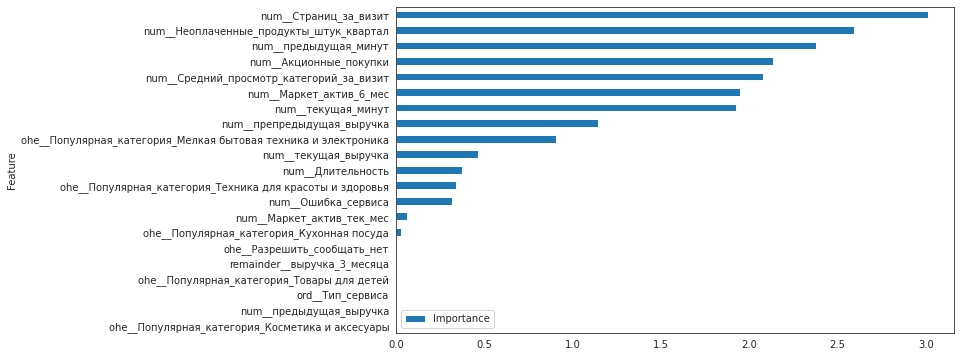

In [33]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': x_Train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance',ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));


    
<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


- отлично, но не забываем что в Логистической регрессия ещё есть логарифм, поэтому если хочешь посмотреть как изменение признака на единицу влияют на вероятность отнесения к классу, то посомтри на экспоненту к коэффициентам логистической регрессии (Это точно было в тренажёре)
    
 

- Если хочешь убрать <AxesSubplot:ylabel='Feature'>  то ставь в конце `;` или пропиши plt.show()



In [34]:
import math

for feature_number, feature_name in enumerate(x_Train.columns):
    exp_weight = math.exp(model.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.6f}") 

ohe__Разрешить_сообщать_нет: +0.995459
ohe__Популярная_категория_Косметика и аксесуары: +1.000000
ohe__Популярная_категория_Кухонная посуда: +0.974751
ohe__Популярная_категория_Мелкая бытовая техника и электроника: +0.404883
ohe__Популярная_категория_Техника для красоты и здоровья: +0.710986
ohe__Популярная_категория_Товары для детей: +1.000000
ord__Тип_сервиса    : +1.000000
num__текущая_минут  : +0.145704
num__предыдущая_минут: +0.092506
num__Длительность   : +1.450812
num__текущая_выручка: +0.628975
num__предыдущая_выручка: +1.000000
num__препредыдущая_выручка: +0.318217
num__Страниц_за_визит: +0.049259
num__Неоплаченные_продукты_штук_квартал: +13.387178
num__Средний_просмотр_категорий_за_визит: +0.125517
num__Маркет_актив_6_мес: +0.142222
num__Маркет_актив_тек_мес: +1.065025
num__Ошибка_сервиса : +0.730163
num__Акционные_покупки: +8.431179
remainder__выручка_3_месяца: +1.000134


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Предлагаю обучиться на train



<div class="alert alert-info">
<b> Саша: </b>  
<br>  Изменение признаков Акционные покупки и num__Неоплаченные_продукты_штук_квартал на единицу больше остальных признаков влияют на вероятность отнесения к классу.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Тут всё правильно подправил

 

In [35]:
#shap.plots.bar(shap_values, max_display=17)
# пишет TypeError: set_ticks() got an unexpected keyword argument 'fontsize'
# скажи, плиз, что не так?

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Вот прямо сразу не скажу.  Не в первый раз вижу такой вопрос от студен.  Первый раз ответ нашёл (гуглил).  Потом уже не мог вспомнить. Был какой-то вариант, но ей богу не могу вспомнить 

**Вывод:**  
Оценили важность признаков для лучшей модели и построили график важности с помощью метода SHAP.   
Признаки, которые мало значимы для модели:  
Популярная_категория,  Маркет_актив_тек_мес, Длительность, Выручка, Ошибка_сервиса, Разрешить_сообщать, Тип_сервиса.  
Признаки, которые сильнее всего влияют на целевой признак:  
Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Минут, Маркет_актив_6_мес.  
Для клиентов с большой долей акционных покупок с целью сохранения покупательской активности необходимо чаще предлагать акционные товары.
Для сохранения активности необходимо увеличить кол-во рекламы и более детальное описание, чтобы было больше кликов по страницам, дольше задерживались на страницах.



  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Построен график важности факторов, график аккуратный
    
    
- Присутствуют выводы о том, какие факторы сильнее/слабее влияют
    
	
- Плюс за использование .beeswarm    
     
<div class="alert alert-warning">



Совет 🤔:
   

     
 

    Для клиентов с большой долей акционных покупок с целью сохранения покупательской активности необходимо чаще предлагать акционные товары.
    
    
- по графику мы увидем что чем больше акционных покупок, тем вероятность снижения активности.  Получается предложим им акционные покупки, они купят, но в следующий месяц всё равно снизит свою активность. Тут не пахнет какой-то выгодой    
    
	
- можно и по-другому оценить важность признаков, это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html) (но не забываем что в логистической регрессии надо учесть логарифм в функция ошибки). Или с помощью [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html)	
	
	


<div class="alert alert-info">
<b> Саша: </b>  
<br> скорректировал: Для клиентов с большой долей акционных покупок с целью сохранения покупательской активности необходимо чаще предлагать товары с маркетинговой ловушкой(отображать крассные ценники, т.е. завысить цену товара, перечеркнуть, и поставить корректную цену)
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Честно говоря я вообще бы предложил не писать тут такого рода предположения.  У нас дальше идёт раздел сегментация, вот там и можешь провести анализ.  А в данном разделе мы просто смотрим какие признаки важны с точки зрения модели и как они влияют на прогноз с точки зрения модели.

## Сегментация покупателей

### Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.

не понял фразу "Используйте результаты моделирования и данные о прибыльности покупателей". 
как сегментация клиентов по признакам связана с моделированием и прибыльностью, если признак "покупательская активность" есть в исходных данных? причем здесь прибыльность, если в задании, при выделении признаков не указан ни у одного сегмента признак-прибыльнось.

Cоберем данные по клиентам, у которых снизилась покупательская активность по группам:  
Признаки, которые описывают коммуникацию сотрудников компании с клиентом  
Признаки, которые описывают продуктовое поведение покупателя  
Признаки, которые описывают поведение покупателя на сайте  
Признаки, которые описывают покупательское поведение клиента.

 
<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


    если признак "покупательская активность" есть в исходных данных 

    
Считается что нужно использовать результаты моделирования.  То есть делать predict_proba, и выбрать клиентов в которых модель особенно сильно уверена что они снизят активность (Что-то ниже и сделал).  Наверное считается что использование прогноза модели даст более детерминированные результаты   
    
Можно использовать модель как источник вдохновения для выбора признаков (если модель считает признак важным для прогноза активности, то логично посмотреть на него поближе). Можно приглядеться на графики shap.beeswarm, увидев там что то интересное. Или можно все это использовать вместе.  Кстати можно подглядеть внутрь моделей не только с помощью shap, но и построить [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) и там подсмотреть  комбинацию признаков с конкретными порогами, сделав упор на признаки - причины. Например проанализировав   plot_tree мы можем увидеть что для такой то группы товаров, при таком то значении акционных покупок и при таком то сервисе, высока доля не снижающих активность клиентов (ничего такого на самом деле нет, это просто пример). И мы сможем сделать более сложные маркетинговые предложения.
    
    
    
    причем здесь прибыльность, если в задании, при выделении признаков не указан ни у одного сегмента признак-прибыльнось.
    
    
    
Для этого у нас есть специальный файлик, там как раз показатель прибыльности  - money, объединяем через id   

In [36]:
# Признаки, которые описывают коммуникацию сотрудников компании с клиентом
data_decreased = data.query('Покупательская_активность == "Снизилась"')
communication = (data_decreased[['Тип_сервиса', 'Разрешить_сообщать', 
                      'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность' ]]
    
)
# Признаки, которые описывают продуктовое поведение покупателя
product = (data_decreased[['Популярная_категория', 'Средний_просмотр_категорий_за_визит', 
                           'Неоплаченные_продукты_штук_квартал']]
)
# Признаки, которые описывают поведение покупателя на сайте
site_behavior = data_decreased[['предыдущая_минут', 'текущая_минут' , 'Страниц_за_визит', 'Ошибка_сервиса']]
# нет данных по кол-ву визитов в месяц, поэтом нет возможности выделить признак "Минут_за_визит"
# нет данных за год, чтобы выделить признак "Время на сайте за прошлый год"

data_decreased['разница_пред_и_предпре_выручки'] = (
    data_decreased['предыдущая_выручка'] - data_decreased['препредыдущая_выручка']
)
data_decreased['разница_тек_и_пред_выручки'] = (
    data_decreased['текущая_выручка'] - data_decreased['предыдущая_выручка']
)

# Признаки, которые описывают покупательское поведение клиента
financial_behav = data_decreased[['разница_пред_и_предпре_выручки', 'разница_тек_и_пред_выручки', 'текущая_выручка']]

/tmp/ipykernel_466/1097494519.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_decreased['разница_пред_и_предпре_выручки'] = (
/tmp/ipykernel_466/1097494519.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_decreased['разница_тек_и_пред_выручки'] = (


### Выберем группу покупателей и предложим, как увеличить её покупательскую активность: 

In [37]:
data_test = data.drop('Покупательская_активность', axis = 1)
data_test = grid.best_estimator_.named_steps['preprocessor'].transform(data_test)
#data_test = pd.DataFrame(data_test, columns=grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out())
data_predict = model.predict_proba(data_test)[:,1]
data['predict_proba'] = data_predict
da = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
net = data.columns
data_testt = data
data_testt[da] = data_test
data_testt = data_testt.drop(net, axis=1)

In [38]:
data_y = data['Покупательская_активность'].apply(lambda x: 1 if x=='Снизилась' else 0)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(data_y, data_predict)}')

Метрика ROC-AUC на тестовой выборке: 0.9109463184144901


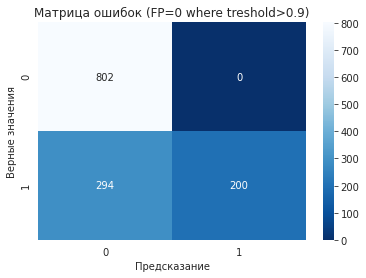

In [39]:
data['y_pred_09']= data['predict_proba'].apply(lambda x: 1 if x>=0.9 else 0)
cm = confusion_matrix(data_y, data['y_pred_09'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок (FP=0 where treshold>0.9)')
plt.ylabel('Верные значения')
plt.xlabel('Предсказание');

In [40]:
pd.set_option('display.max_columns', None)
data_analysis = data.query('predict_proba > 0.9')
data_analysis['разница_пред_и_предпре_выручки'] = (
    data_analysis['предыдущая_выручка'] - data_analysis['препредыдущая_выручка']
)
data_analysis['разница_тек_и_пред_выручки'] = (
    data_analysis['текущая_выручка'] - data_analysis['предыдущая_выручка']
)

data_analysis['разница_тек_и_пред_минут'] = (
    data_analysis['текущая_минут'] - data_analysis['предыдущая_минут']
)

data_analysis = data_analysis.merge(data_money, on = 'id', how = 'left')
data_aa  = data_analysis.query('разница_тек_и_пред_выручки < 0 and разница_тек_и_пред_минут<0').sort_values('Тип_сервиса')
data_aa

/tmp/ipykernel_466/3293778705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analysis['разница_пред_и_предпре_выручки'] = (
/tmp/ipykernel_466/3293778705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analysis['разница_тек_и_пред_выручки'] = (
/tmp/ipykernel_466/3293778705.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущая_минут,текущая_минут,предыдущая_выручка,препредыдущая_выручка,текущая_выручка,выручка_3_месяца,predict_proba,ohe__Разрешить_сообщать_нет,ohe__Популярная_категория_Косметика и аксесуары,ohe__Популярная_категория_Кухонная посуда,ohe__Популярная_категория_Мелкая бытовая техника и электроника,ohe__Популярная_категория_Техника для красоты и здоровья,ohe__Популярная_категория_Товары для детей,ord__Тип_сервиса,num__текущая_минут,num__предыдущая_минут,num__Длительность,num__текущая_выручка,num__предыдущая_выручка,num__препредыдущая_выручка,num__Страниц_за_визит,num__Неоплаченные_продукты_штук_квартал,num__Средний_просмотр_категорий_за_визит,num__Маркет_актив_6_мес,num__Маркет_актив_тек_мес,num__Ошибка_сервиса,num__Акционные_покупки,remainder__выручка_3_месяца,y_pred_09,разница_пред_и_предпре_выручки,разница_тек_и_пред_выручки,разница_тек_и_пред_минут,Прибыль
1,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,11,9,5795.5,4942.0,5484.8,16222.3,0.951102,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.263158,0.333333,0.612735,0.540818,0.730117,0.539297,0.105263,0.3,0.4,0.596491,0.5,0.333333,0.988636,16222.3,1,853.5,-310.7,-2,2.67
18,215412,Снизилась,премиум,да,2.9,3,506,0.90,Товары для детей,1,5,3,4,10,9,5499.5,4607.0,5294.1,15400.6,0.990231,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.263158,0.277778,0.401879,0.502986,0.655736,0.325240,0.157895,0.5,0.0,0.350877,0.0,0.333333,0.897727,15400.6,1,892.5,-205.4,-1,1.63
32,215437,Снизилась,премиум,да,2.4,3,602,0.32,Косметика и аксесуары,2,5,3,3,10,6,4987.5,4875.0,4834.1,14696.6,0.961638,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.105263,0.277778,0.502088,0.411729,0.527076,0.496486,0.105263,0.5,0.2,0.263158,0.0,0.333333,0.238636,14696.6,1,112.5,-153.4,-4,4.85
99,215547,Снизилась,премиум,нет,2.6,3,308,0.89,Домашний текстиль,2,8,6,5,14,10,5274.5,4655.0,5199.1,15128.6,0.982407,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.315789,0.500000,0.195198,0.484139,0.599196,0.355911,0.210526,0.8,0.2,0.298246,0.0,0.666667,0.886364,15128.6,1,619.5,-75.4,-4,3.45
148,215638,Снизилась,стандарт,да,2.4,4,549,0.30,Кухонная посуда,1,6,3,2,14,12,5195.0,4436.0,4924.6,14555.6,0.958836,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.421053,0.500000,0.446764,0.429682,0.579218,0.215974,0.052632,0.6,0.0,0.263158,0.5,0.333333,0.215909,14555.6,1,759.0,-270.4,-2,4.94
143,215627,Снизилась,стандарт,да,4.0,3,451,0.89,Домашний текстиль,2,4,3,2,8,6,5022.0,4527.0,4470.8,14019.8,0.987351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.166667,0.344468,0.339655,0.535746,0.274121,0.052632,0.4,0.2,0.543860,0.0,0.333333,0.886364,14019.8,1,495.0,-551.2,-2,4.92
118,215595,Снизилась,стандарт,да,3.9,3,332,0.30,Домашний текстиль,2,5,5,1,12,9,6399.5,4751.0,5857.4,17007.9,0.926831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263158,0.388889,0.220251,0.614736,0.881895,0.417252,0.000000,0.5,0.2,0.526316,0.0,0.555556,0.215909,17007.9,1,1648.5,-542.1,-3,4.52
110,215571,Снизилась,стандарт,да,4.8,5,483,0.39,Косметика и аксесуары,2,7,1,2,12,8,5874.5,4709.0,5719.8,16303.3,0.957770,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.388889,0.377871,0.587438,0.749969,0.390415,0.052632,0.7,0.2,0.684211,1.0,0.111111,0.318182,16303.3,1,1165.5,-154.7,-4,3.45
96,215541,Снизилась,стандарт,нет,4.4,4,616,0.27,Товары для детей,1,7,4,2,10,9,3518.0,4605.0,3416.6,11539.6,0.957207,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.263158,0.277778,0.516701,0.130518,0.157809,0.323962,0.052632,0.7,0.0,0.614035,0.5,0.444444,0.181818,11539.6,1,-1087.0,-101.4,-1,4.48
74,215504,Снизилась,стандарт,да,3.4,5,458,0.90,Товары для детей,2,4,2,2,11,10,3432.0,4543.0,3412.5,11387.5,0.973892,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.315789,0.333333,0.351775,0.129704,0.136198,0.284345,0.052632,0.4,0.2,0.438596,1.0,0.222222,0.897727,11387.5,1,-1111.0,-19.5,-1,2.08


In [41]:
data_id = data_aa['id'].tolist()
data_test = data_testt.query('@data_testt.index in @data_id')

data_test

,ohe__Разрешить_сообщать_нет,ohe__Популярная_категория_Косметика и аксесуары,ohe__Популярная_категория_Кухонная посуда,ohe__Популярная_категория_Мелкая бытовая техника и электроника,ohe__Популярная_категория_Техника для красоты и здоровья,ohe__Популярная_категория_Товары для детей,ord__Тип_сервиса,num__текущая_минут,num__предыдущая_минут,num__Длительность,num__текущая_выручка,num__предыдущая_выручка,num__препредыдущая_выручка,num__Страниц_за_визит,num__Неоплаченные_продукты_штук_квартал,num__Средний_просмотр_категорий_за_визит,num__Маркет_актив_6_мес,num__Маркет_актив_тек_мес,num__Ошибка_сервиса,num__Акционные_покупки,remainder__выручка_3_месяца
id,,,,,,,,,,,,,,,,,,,,,
215364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.263158,0.333333,0.612735,0.540818,0.730117,0.539297,0.105263,0.3,0.4,0.596491,0.5,0.333333,0.988636,16222.3
215374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.333333,0.153445,0.587656,0.721824,0.362939,0.052632,0.3,1.0,0.350877,1.0,0.222222,0.988636,16149.4
215410,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.055556,0.967641,0.366794,0.489760,0.095847,0.000000,0.5,0.6,0.368421,0.0,0.333333,0.886364,13694.6
215412,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.263158,0.277778,0.401879,0.502986,0.655736,0.325240,0.157895,0.5,0.0,0.350877,0.0,0.333333,0.897727,15400.6
215420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263158,0.333333,0.342380,0.484377,0.596557,0.300319,0.052632,0.9,0.0,0.456140,1.0,0.222222,0.272727,15032.3
215437,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.105263,0.277778,0.502088,0.411729,0.527076,0.496486,0.105263,0.5,0.2,0.263158,0.0,0.333333,0.238636,14696.6
215442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.166667,0.184760,0.319896,0.446036,0.523323,0.105263,0.3,1.0,0.263158,0.5,0.222222,0.886364,13953.2
215465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263158,0.333333,0.342380,0.307556,0.361478,0.307348,0.052632,0.9,0.0,0.456140,1.0,0.222222,0.193182,13216.5
215504,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.315789,0.333333,0.351775,0.129704,0.136198,0.284345,0.052632,0.4,0.2,0.438596,1.0,0.222222,0.897727,11387.5


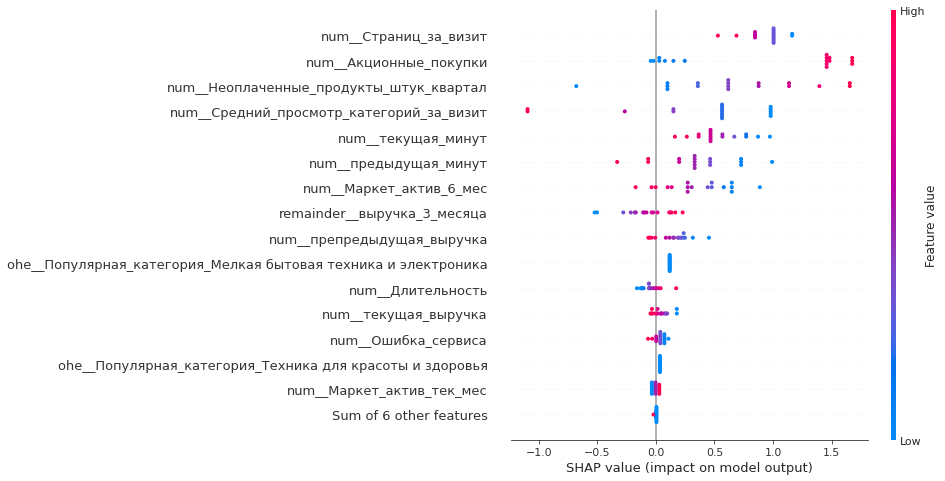

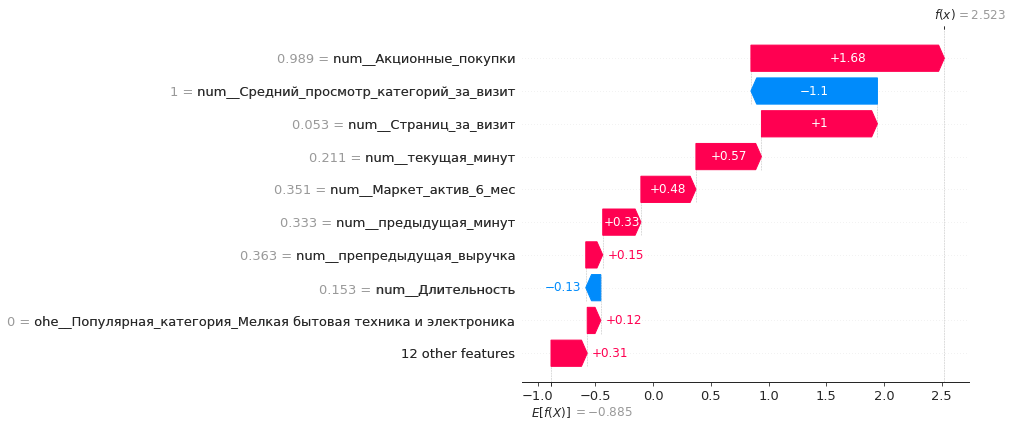

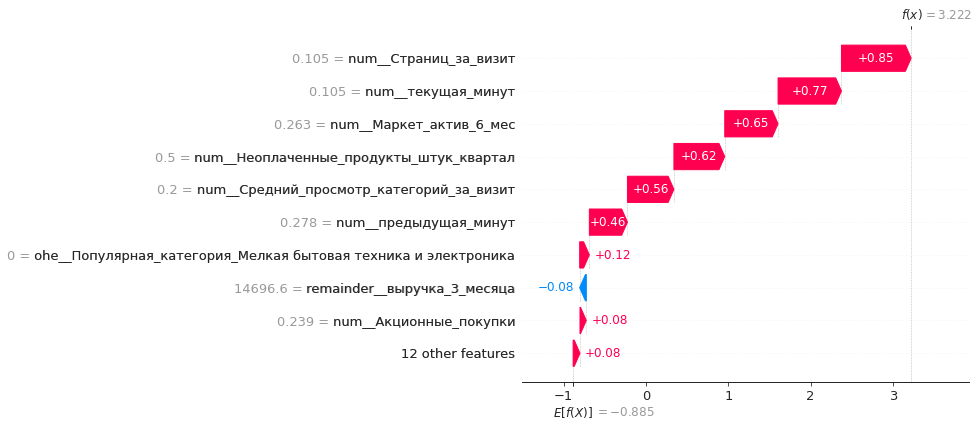

In [42]:
shap_values = explainer(data_test)
shap.plots.beeswarm(shap_values, max_display=16) 
shap.plots.waterfall(shap_values[1]) 
shap.plots.waterfall(shap_values[5]) 

**Вывод:**  
Cобрали данные по клиентам, у которых снизилась покупательская активность по группам:
1. признаки, которые описывают коммуникацию сотрудников компании с клиентом;
2. признаки, которые описывают продуктовое поведение покупателя;
3. признаки, которые описывают поведение покупателя на сайте;
4. признаки, которые описывают покупательское поведение клиента;
Выбрали группу покупателелей, у которых:  
1. с вероятностью 90% и выше снизится покупательская активость;
2. текущая выручка упала по сравнению с предыдущей;
3. в текущем месяце время нахождения на сайте стало меньше, чем в предыдущем месяце.  
По выбранной группе клиентов выявили, что почти все покупатели, которые отказались от получении информация о том, можно ли присылать  дополнительные предложения о товаре с долей в 89% и выше осуществляют только акционные покупки. Необходимо данным клиентам повторно предлагать получение информации по смс, почте или при телфонной коммуникации.  
На снижение выручки влияют такие признаки как акционные покупки, среднее кол-во страниц за визит, кол-во неоплаченных продуктов за квартал.   
Снижение покупательской активности в связи с высокой долей акционных покупок от общих покупок может говорить о том, что данный сегмент не готов покупать товары без акций и вероятнее всего количество акций за последние 3 месяца значительно сократилось. Данному сегменту необходимо чаще всего направлять информацию по акциям и сделать интерфейс сайта так, чтобы клиентам в первую очередь высвечивались любимые товары со скидками.   
Увеличенное количество страниц за визит может означать, что клиенты долго ищут товары по акциям и сделать это им проблематично, что также поможет изменение интерфейса сайта с предложением акционных покупок по любимым товарам.  
Спад общего времени нахождения на сайте означает, что клиенты неохотно заходят на сайт после того, как не смогли найти подходящих товаров со скидками и ищут аналогичные товары у конкурентов.  
Одной из причин высокого количества неоплаченных продуктов может говорить о том, что клиенты находят аналогичную продукцию дешевле у конкурентов. Возможно стоит для данного сегмента сделать акцию "нашли дешевле? пришлите ссылку компании, где данный товар дешвле и мы вернем вам разницу!"


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Рассуждения увидел


 
    
    
    
<div class="alert alert-warning">



Совет 🤔:


 
    

- У нас есть файл money, в нем содержится важная информация о прибыльности клиентов. Это наверно самый важный параметр с точки зрения бизнеса: клиент может много покупать, но прибыльность от него будет небольшой, или наоборот клиент может мало покупать, но он покупает товары которые продавать магазину выгодно. Чувствуешь разницу?! Стоит обогатить наши данные этой информацией
    
    
     
 
- После выбора сегмента мы можем посмотреть усредненное лицо клиентов попавших в него, но сами по себе цифры нас не интересуют, нас интересует разница с клиентами не попавшими в сегмент. поэтому стоит проанализировать сегмент, указать на его отличия от остальных. для этого отлично подойдут графики countplot/pie (для категориальных) и гистограмму или boxplot (для количественных), а разбивке "наш сегмент" - "не наш сегмент"


- Еще можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория, тип сервиса, разрешить сообщить), возможно тут получится увидеть что то интересное и сделать какие то маркетинговые предложения. Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное.


    

<div class="alert alert-info">
<b> Саша: </b>  
<br> добавил еще сегмент клиентов ниже
</div>

In [43]:
data = data.merge(data_money, on = 'id', how = 'left')
print(data['выручка_3_месяца'].describe())
data['Прибыль'].describe()

count     1296.000000
mean     15021.766975
std       1581.337135
min      10437.600000
25%      13954.325000
50%      15072.550000
75%      16087.025000
max      19766.500000
Name: выручка_3_месяца, dtype: float64


count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

In [44]:
data_max_profit = (
    data
    .query('Покупательская_активность == "Снизилась" & Прибыль > 4.67 & выручка_3_месяца < 13954.326 & Акционные_покупки > 0.6')
    .sort_values('Прибыль', ascending=True).set_index('id')
)

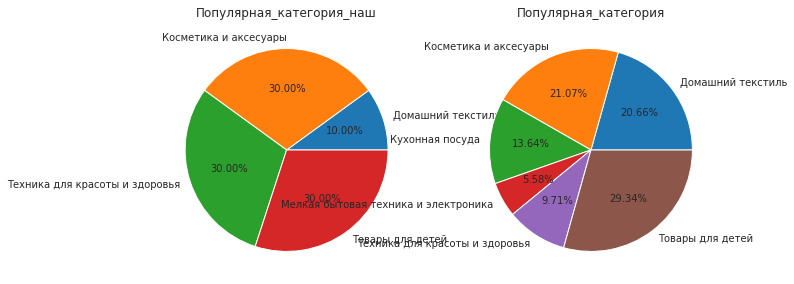

In [45]:
data_not_max_profit = (
    data.query('id not in @data_max_profit.index & Покупательская_активность== "Снизилась" ')
)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,10))
(
    data_max_profit.pivot_table(index='Популярная_категория', aggfunc='count')
    .plot(kind='pie', ylabel='', y= 'num__Акционные_покупки',
            title='Популярная_категория_наш', autopct='%1.2f%%', legend=False, ax=axes[0])
)

(
    data_not_max_profit.pivot_table(index='Популярная_категория', aggfunc='count')
    .plot(kind='pie', ylabel='', y ='num__Акционные_покупки',
            title='Популярная_категория', autopct='%1.2f%%', legend=False, ax=axes[1])
)
plt.show()

Клиентам, у которых снизилась покупательская активность, доля Акционных покупок составляет больше 60% и популярные категории:  
Косметика и аксесуары  
Техника для красоты и здоровья,   
Товары для детей,   
Домашний текстиль    
можно больше предлагать акционных покупок по данным категориям, так как данный сегмент даже с большой долей акционных покупок приносят болье прибыли, чем остальные клиенты.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Можно было такого рода сравнение сделать для всех признаков 

## Общий вывод

1. Проанализировали 4 датафрейма.
Дубликаты не выявлены.
Убрали пробел у названий столбцов из датафрейма data_marketдля дальнейшего обучения модели.
Выявлены и устранены неявные дубликаты значений в столбце Тип_сервиса.
2. Провели исследовательский анализ и устранили аномалии в данных, убрали данные по клиентам с выручкой равной 0. Отобрали клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Наблюдается сильный разброс выручки за текущий_месяц и небольшой разброс(низкое стандартное отклонение) за препредыдущий_месяц.
3. Объединили 3 таблицы (data_market, data_m_time, data_m_money), разбили периоды на столбцы.
4. Провели корреляционный анализ. Утечки данных,связанных с покупательской активностью,  не выявлено. Мультиколлинеарность не выявлена. На покупательскую активность сильно влияет время нахождения на сайте и количество просмотренных страниц за минуту.
5. Построили пайплайны для выбора лучшей модели.
Лучшая модель: LogisticRegression с гиперпараметрами: C=1, penalty='l1', random_state=42, solver='liblinear').  
Метрика лучшей модели на кроссвалидационной выборке: 0.8975774079864989.  
Метрика ROC-AUC на тестовой выборке: 0.917404845690248  
6. Оценили важность признаков для лучшей модели и построили график важности с помощью метода SHAP.
Признаки, которые мало значимы для модели:
Популярная_категория, Маркет_актив_тек_мес, Длительность, Выручка, Ошибка_сервиса, Разрешить_сообщать, Тип_сервиса.
Признаки, которые сильнее всего влияют на целевой признак:
Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Минут, Маркет_актив6мес.
Для клиентов с большой долей акционных покупок с целью сохранения покупательской активности необходимо чаще предлагать акционные товары. Для сохранения активности необходимо увеличить кол-во рекламы и более детальное описание, чтобы было больше кликов по страницам, дольше задерживались на страницах.
7. Cобрали данные по клиентам, у которых снизилась покупательская активность по группам:
- признаки, которые описывают коммуникацию сотрудников компании с клиентом;
- признаки, которые описывают продуктовое поведение покупателя;
- признаки, которые описывают поведение покупателя на сайте;
- признаки, которые описывают покупательское поведение клиента.   
Выбрали группу покупателелей, у которых:  
с вероятностью 90% и выше снизится покупательская активость;  
текущая выручка упала по сравнению с предыдущей;  
в текущем месяце время нахождения на сайте стало меньше, чем в предыдущем месяце.  
По выбранной группе клиентов выявили, что почти все покупатели, которые отказались от получении информация о том, можно ли присылать дополнительные предложения о товаре с долей в 89% и выше осуществляют только акционные покупки. Необходимо данным клиентам повторно предлагать получение информации по смс, почте или при телфонной коммуникации.  
На снижение выручки влияют такие признаки как акционные покупки, среднее кол-во страниц за визит, кол-во неоплаченных продуктов за квартал.  
Снижение покупательской активности в связи с высокой долей акционных покупок от общих покупок может говорить о том, что данный сегмент не готов покупать товары без акций и вероятнее всего количество акций за последние 3 месяца значительно сократилось. Данному сегменту необходимо чаще всего направлять информацию по акциям и сделать интерфейс сайта так, чтобы клиентам в первую очередь высвечивались любимые товары со скидками.  
Увеличенное количество страниц за визит может означать, что клиенты долго ищут товары по акциям и сделать это им проблематично, что также поможет изменение интерфейса сайта с предложением акционных покупок по любимым товарам.  
Спад общего времени нахождения на сайте означает, что клиенты неохотно заходят на сайт после того, как не смогли найти подходящих товаров со скидками и ищут аналогичные товары у конкурентов.  
Одной из причин высокого количества неоплаченных продуктов может говорить о том, что клиенты находят аналогичную продукцию дешевле у конкурентов. Возможно стоит для данного сегмента сделать акцию "нашли дешевле? пришлите ссылку компании, где данный товар дешвле и мы вернем вам разницу!"
8. Клиентам, у которых снизилась покупательская активность, доля Акционных покупок составляет больше 60% и популярные категории:
Косметика и аксесуары  
Техника для красоты и здоровья,  
Товары для детей,  
Домашний текстиль  
можно больше предлагать акционных покупок по данным категориям, так как данный сегмент даже с большой долей акционных покупок приносят болье прибыли, чем остальные клиенты.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Александр, у тебя старательно выполненная работа, все четко, осмысленно.  



Выводы подробные, в конце разделов есть промежуточные выводы.




    
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

    
 
       
- хорошо бы корреляцию и графики построить в том числе в разбивке по таргету, это хороший подход если мы хотим увидеть что то интересное дополнительно
    
	
    
- поработать надо оформлением графиков, используя subplots,  seaborn вместо matplotlib     

    

    
Обязательное к исправлению:



    
    
- ошибка исполнения кода
    
 
    


- для всех колличественных признаков строим и гистограмму и boxplot  
    
    
    
- первосердствовал с поиском аномалий, при этом никак это не прокомментировал    
    
    

    
- shap обучаем на тренировочной выборке 
    
    
    
- неверно подсчитана roc-auc 
    
    
- объясняем почему выбрали ту или иную метрику
    
    
    
- в тренажере была неточность, .best_score_ это метрика по кросс валидации


    
    



Посылаю на вторую итерацию, чтобы ответить на вопросы если они появятся, на связи
    





Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
    
Работу можно принимать, на всякий случай отправлю на третью итерациюб вдруг остались вопросы    

<div class="alert alert-info">
<b> Саша: </b>  
<br> Спасибо за ревью. очень понравилось и теперь буду строить графики и тд через seaborn, красиво выглядят. Вопросы всегда у меня есть, в процессе работы, но в данный момент нет) поищу готовые библиотеки по выявлению опечаток, дубликатов и тд.
    
я вначале написал вопрос, наверно ты не заметил:
    Уточни, плиз, после 1 раза ввода !pip, когда все обновилось/установилось, то потом нужно эти коды удалять?
    или если я удалю, то при обно
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:

Ну хоть какая-то пользу из моего ревью есть )   
Действительно не заметил, исправился



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!  

    
 
Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа  Саша. Желаю успехов в дальнейшей учебе!
